In [81]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.ticker as tick
import scipy.stats as stat
import os
from jupyterthemes import jtplot

In [58]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (5*16/9,5)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]
mp.rcParams["errorbar.capsize"] = 2

unp_n = unp.nominal_values
unp_sd = unp.std_devs

In [127]:
def f(p, q):
    return 1/(1/p + 1/q)

def Mp(p, q):
    return np.abs(q/p)

def Md(do, di):
    return di/do

def limit(x, df):
    return stat.chi2.ppf(x, df=df)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

In [82]:
ps = unp.uarray(np.zeros(3), np.zeros(3))
qs = unp.uarray(np.zeros(3), np.zeros(3))
dis = unp.uarray(np.zeros(3), np.zeros(3))

for _, __, files in os.walk("."):
    i = 0
    for file in files:
        if file.endswith(".txt"):
            p, q, di = np.genfromtxt(file, skip_header=1, unpack=True)
            ps[i] = uc.ufloat(p.mean(), p.std())
            qs[i] = uc.ufloat(q.mean(), q.std())
            dis[i] = uc.ufloat(di.mean(), di.std())
            i += 1

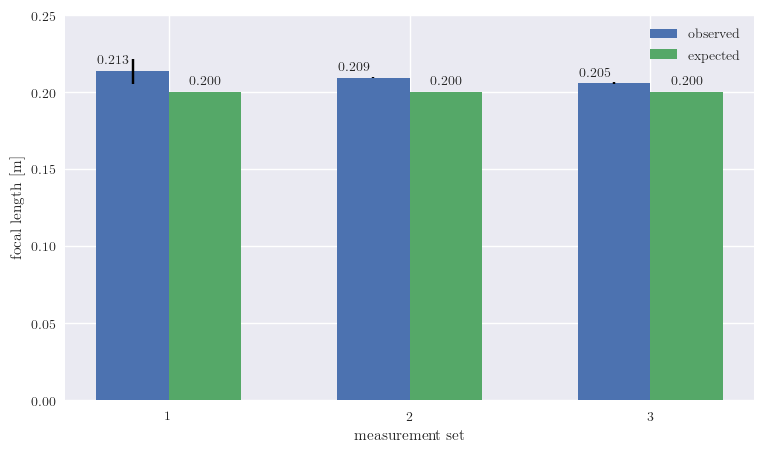

In [130]:
fig = mp.figure()

w = 0.3
x = np.arange(1, len(ps)+1)
xp = np.ones_like(x)*0.2
ax = fig.add_subplot(111)
obs = ax.bar(x-w/2, unp_n(f(ps, qs)), width=w, yerr=unp_sd(f(ps, qs)), label="observed")
exp = ax.bar(x+w/2, xp, width=w, label="expected")
ax.set_xlabel("measurement set")
ax.set_ylabel("focal length [m]")
ax.set_xticks(x)
ax.set_ylim(0, 0.25)
ax.legend()

autolabel(obs, "left")
autolabel(exp, "center")

mp.savefig("focallength.png", bbox_inches="tight", dpi=300, transparent=True)
mp.show()

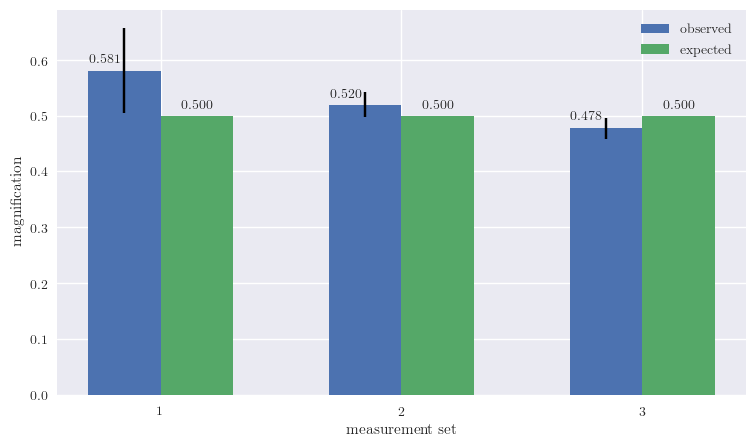

In [131]:
fig = mp.figure()

w = 0.3
x = np.arange(1, len(ps)+1)
xp = np.ones_like(x)*0.5
ax = fig.add_subplot(111)
obs = ax.bar(x-w/2, unp_n(Md(do, dis)), width=w, yerr=unp_sd(Md(do, dis)), label="observed")
exp = ax.bar(x+w/2, xp, width=w, label="expected")
ax.set_xlabel("measurement set")
ax.set_ylabel("magnification")
ax.set_xticks(x)
# ax.set_ylim(0, 0.25)
ax.legend()

autolabel(obs, "left")
autolabel(exp, "center")

mp.savefig("mag-d.png", bbox_inches="tight", dpi=300, transparent=True)
mp.show()

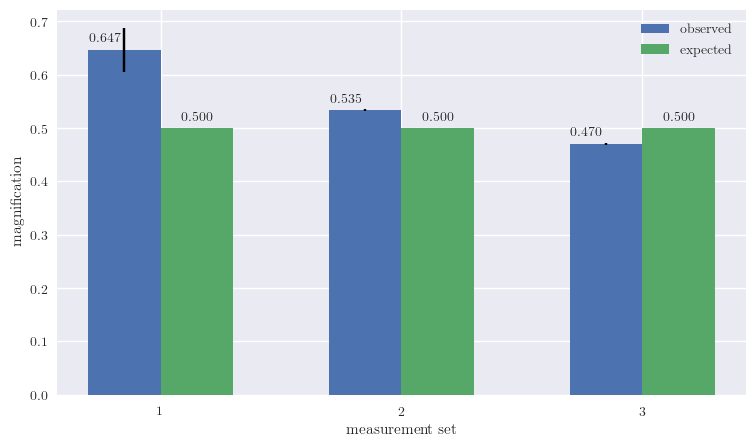

In [132]:
fig = mp.figure()

w = 0.3
x = np.arange(1, len(ps)+1)
xp = np.ones_like(x)*0.5
ax = fig.add_subplot(111)
obs = ax.bar(x-w/2, unp_n(Mp(ps, qs)), width=w, yerr=unp_sd(Mp(ps, qs)), label="observed")
exp = ax.bar(x+w/2, xp, width=w, label="expected")
ax.set_xlabel("measurement set")
ax.set_ylabel("magnification")
ax.set_xticks(x)
# ax.set_ylim(0, 0.25)
ax.legend()

autolabel(obs, "left")
autolabel(exp, "center")

mp.savefig("mag-p.png", bbox_inches="tight", dpi=300, transparent=True)
mp.show()